In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
dphi = np.array([0.00099, 0.01259, 0.02259, 0.03259, 0.04259, 0.06259, 0.08259, 0.10259, 0.12259, 0.14259, 0.16259, 0.18259, 
                 0.20259, 0.22259, 0.24259, 0.26259, 0.28259, 0.30259, 0.32259, 0.34259, 0.39259, 0.44259, 0.49259, 0.54259, 
                 0.59259, 0.64259, 0.69259, 0.74259, 0.84259, 0.94259, 1.04259])
ql0 = np.array([10.512, 10.409, 10.161, 9.7880, 9.3170, 8.2121, 7.0871, 6.0918, 5.2653, 4.5801, 3.9988, 3.5009, 3.0773, 2.7164,
                2.4032, 2.1263, 1.8822, 1.6712, 1.4909, 1.3345, 1.0125, 0.7831, 0.6128, 0.4821, 0.3872, 0.3145, 0.2573, 0.2123, 
                0.1475, 0.1047, 0.0752])
ql2 = np.array([9.8631, 9.7903, 9.6136, 9.3439, 8.9948, 8.1334, 7.1796, 6.2539, 5.4240, 4.7096, 4.1034, 3.5889, 3.1502, 2.7740, 
                2.4489, 2.1663, 1.9200, 1.7056, 1.5190, 1.3562, 1.0305, 0.7948, 0.6214, 0.4915, 0.3938, 0.3188, 0.2602, 0.2141,
                0.1477, 0.1040, 0.0738])
ql8 = np.array([8.6893, 8.6506, 8.5557, 8.4079, 8.2108, 7.6938, 7.0601, 6.3686, 5.6708, 5.0053, 4.3958, 3.8530, 3.3778, 2.9658,
                2.6098, 2.3023, 2.0362, 1.8054, 1.6046, 1.4296, 1.0820, 0.8309, 0.6470, 0.5104, 0.4075, 0.3288, 0.2676, 0.2197,  
                0.1510, 0.1058, 0.0745])

In [5]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('phi_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [11]:
def integrate(binwidth, yarray, low, high):
    s = 0
    interval = (int)((high - low)/binwidth)
    for i in range(0, interval):
        s = s + binwidth * yarray[i]
    return s

In [6]:
files = ["$HOME/EIC/output/1123.root"]
a = getData(files)


Processed $HOME/EIC/output/1123.root in 132.6 seconds


In [7]:
d = applyCut(a, 'pt_electron > 9 and pt_electron < 11', '9 < pt_electron < 11 GeV')
d = fixPhi(d, 'photon')

9 < pt_electron < 11 GeV 308126  fraction kept: 0.7
Fixed photon phi range
Fixed photon delta phi range


In [8]:
d.eval('nu = 0.533*Q2/x',inplace=True)

In [9]:
print np.mean(d['x']), np.mean(d['nu'])

0.13316031 911.919


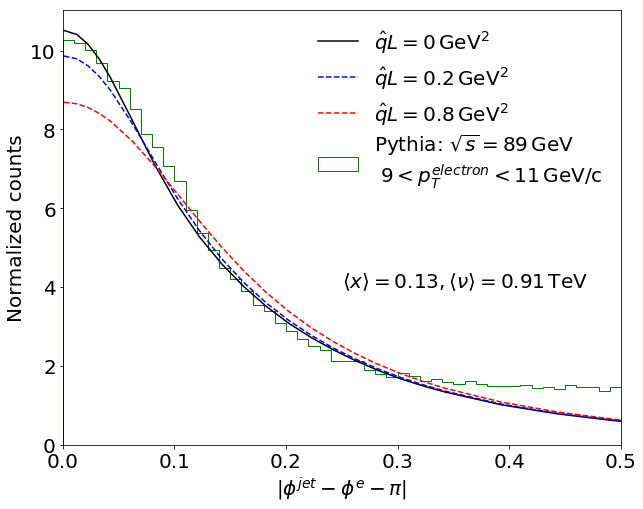

In [16]:
fig = plt.figure(figsize = (10,8))
hist = plt.hist(d['delta_phi_photon_abs'], range=(0,0.5), bins=50)
plt.cla()
weights = [np.trapz(ql0,dphi)/integrate(0.01, hist[0], 0, 0.5)] * len(d['delta_phi_photon_abs'])
plt.hist(d['delta_phi_photon_abs'], range=(0,0.5), bins=50, histtype='step', color='green', \
         label='Pythia: $\sqrt{s}=89 \, \mathrm{GeV}$ \n $9 < p_T^{electron} < 11 \, \mathrm{GeV/c}$', weights=weights)
plt.plot(dphi, ql0, color='black', label='$\hat{q}L=0 \, \mathrm{GeV^2}$')
plt.plot(dphi, ql2, 'b--', label='$\hat{q}L=0.2 \, \mathrm{GeV^2}$')
plt.plot(dphi, ql8, 'r--', label='$\hat{q}L=0.8 \, \mathrm{GeV^2}$')
plt.xlim(left=0, right=0.5)
plt.xlabel('$|\phi^{jet} - \phi^e - \pi|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.25,4,r'$\langle x \rangle = 0.13, \langle \nu \rangle = 0.91 \, \mathrm{TeV}$', fontsize = 20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.savefig('images/dphi.pdf', bbox_inches='tight')